In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from bibs import Perceptron
from bibs import AdalineBatch
from bibs import AdalineEstocástico
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Desenhe o gráfico de região de decisão (plot_decision_regions) de cada um dos 3 algoritmos acima para os dados do dataset pima-indians-diabetes.csv.

In [2]:
dados = pd.read_csv('pima-indians-diabetes.csv', header=None)

In [3]:
dados.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = dados.iloc[0:, 8].values
X = dados.iloc[0:, [1, 2]].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

In [6]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

C:\Users\natan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Perceptron

In [7]:
ppn = Perceptron.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train_std, y_train);

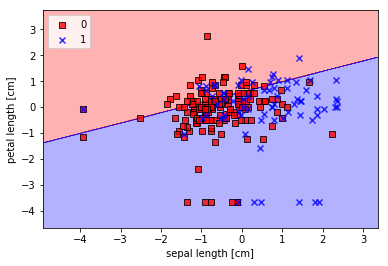

In [8]:
Perceptron.plot_decision_regions(X_test_std, y_test, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaline com Gradiente Descendente Batch

In [9]:
adaline_b = AdalineBatch.AdalineGD(n_iter=15, eta=0.01)
adaline_b.fit(X_train_std, y_train);

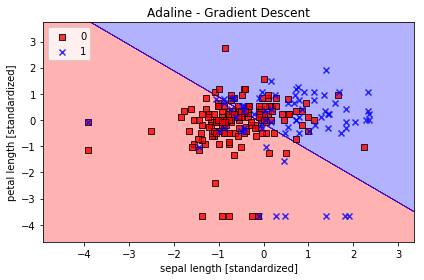

In [10]:
AdalineBatch.plot_decision_regions(X_test_std, y_test, classifier=adaline_b)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Adaline com Gradiente Descendente Estocástico 

In [11]:
adaline_g = AdalineEstocástico.AdalineSGD(n_iter=15, eta=0.01, random_state=1)
adaline_g.fit(X_train_std, y_train);

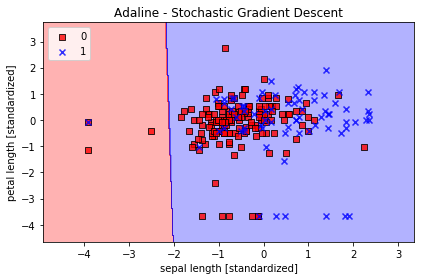

In [12]:
AdalineEstocástico.plot_decision_regions(X_test_std, y_test, classifier=adaline_g)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Use K-Fold Cross Validation Estratificada com k = 3 para obter a acurácia dos 3 algoritmos acima sobre o dataset pima-indians-diabetes.csv. Faça Standardization dos dados (fit para o conjunto de treino e transform para treino e teste).

In [13]:
aux = StratifiedKFold(n_splits=3, shuffle=True)
aux.get_n_splits();

In [14]:
vet_acc_perc = []
vet_acc_ad_g = []
vet_acc_est = []
vet_acc_knn = []
vet_acc_naive = []
vet_acc_svm = []

for index_train, index_test in aux.split(X, y):
    X_train, X_test = X[index_train], X[index_test]
    y_train, y_test = y[index_train], y[index_test]
    
    std = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std.transform(X_train)
    X_test_std = std.transform(X_test)
    
    #Perceptron
    model_perc = Perceptron.Perceptron(eta=0.0000001, n_iter=20)
    model_perc.fit(X_train_std, y_train)
    y_pred_perc = model_perc.predict(X_test_std)
    vet_acc_perc.append(metrics.accuracy_score(y_test, y_pred_perc))
    
    #Adaline com Gradiente Descendente Batch
    model_adaline_g = AdalineBatch.AdalineGD(n_iter=20, eta=0.0000001)
    model_adaline_g.fit(X_train_std, y_train)
    y_pred_ad_g = model_adaline_g.predict(X_test_std)
    vet_acc_ad_g.append(metrics.accuracy_score(y_test, y_pred_ad_g))
    
    #Adaline com Gradiente Descendente Estocástico
    model_est = AdalineEstocástico.AdalineSGD(n_iter=20, eta=0.0000001, random_state=1)
    model_est.fit(X_train_std, y_train)
    y_pred_est = model_est.predict(X_test_std)
    vet_acc_est.append(metrics.accuracy_score(y_test, y_pred_est))
    
    #KNN
    model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)
    y_pred_knn = model_knn.predict(X_test_std)
    vet_acc_knn.append(metrics.accuracy_score(y_test, y_pred_knn))
    
    #Naive Bayes
    model_naive = GaussianNB().fit(X_train_std, y_train)
    y_pred_naive = model_naive.predict(X_test_std)
    vet_acc_naive.append(metrics.accuracy_score(y_test, y_pred_naive))
    
    #SVM
    model_svm = SVC().fit(X_train_std, y_train)
    y_pred_svm = model_svm.predict(X_test_std)
    vet_acc_svm.append(metrics.accuracy_score(y_test, y_pred_svm))
    
    
print("Accuracy Perceptron: ", np.mean(vet_acc_perc))
print("Accuracy Adaline Batch: ", np.mean(vet_acc_ad_g))
print("Accuracy Adaline Estocastico: ", np.mean(vet_acc_est), '\n')
print("Accuracy KNN: ", np.mean(vet_acc_knn))
print("Accuracy Naive Bayes: ", np.mean(vet_acc_naive))
print("Accuracy SVM: ", np.mean(vet_acc_svm))    

C:\Users\natan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy Perceptron:  0.328133404383154
Accuracy Adaline Batch:  0.3385501902609292
Accuracy Adaline Estocastico:  0.3385501902609292 

Accuracy KNN:  0.6966522143066046
Accuracy Naive Bayes:  0.7512638761730374
Accuracy SVM:  0.746111393244068


# Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

O Adaline com Gradiente Descendente em Batch minimiza uma função de custo tomando uma etapa na direção oposta a um gradiente de custo calculado a partir de todo o conjunto de treinamento, tornando-o computacionalmente muito caro. O Adaline com Gradiente Descendente Estocástico alcança a convergência muito mais rapidamente devido às atualizações de peso mais frequentes. Cada gradiente é calculado com base em um único exemplo de treinamento.